In [67]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from flax import linen as nn
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from modules.evaluation_functions.bnn_functions import *
from datetime import date
rng_key = jax.random.key(int(date.today().strftime("%Y%m%d")))

from modules.application_functions.finance_functions import *

In [68]:
target = "SPY"
daily_prices = yf.download(target)
full_df = daily_prices["2007-01-01":]
full_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,142.250000,142.860001,140.570007,141.369995,101.852058,94807600
2007-01-04,141.229996,142.050003,140.610001,141.669998,102.068192,69620600
2007-01-05,141.330002,141.399994,140.380005,140.539993,101.254112,76645300
2007-01-08,140.820007,141.410004,140.250000,141.190002,101.722412,71655000
2007-01-09,141.309998,141.600006,140.399994,141.070007,101.635956,75680100
...,...,...,...,...,...,...
2024-02-22,504.010010,508.489990,503.019989,507.500000,507.500000,76402500
2024-02-23,509.269989,510.130005,507.100006,507.850006,507.850006,61284200
2024-02-26,508.299988,508.750000,505.859985,505.989990,505.989990,50386700


In [69]:
errors=full_df.isna().any(axis=1)
errors[errors==True]

Series([], dtype: bool)

In [70]:
investment_horizon = 10
bound_volas = [2, 1.5]

full_df = yfinance_labeler(full_df, investment_horizon, bound_volas)
full_df

4316


,Open,High,Low,Close,Adj Close,Volume,vola,label,upper_bound,lower_bound
Date,,,,,,,,,,
2007-01-05,141.330002,141.399994,140.380005,140.539993,101.254112,76645300,0.007141,1,142.547092,139.034669
2007-01-08,140.820007,141.410004,140.250000,141.190002,101.722412,71655000,0.006747,1,143.095209,139.761097
2007-01-09,141.309998,141.600006,140.399994,141.070007,101.635956,75680100,0.005375,1,142.586370,139.932735
2007-01-10,140.580002,141.570007,140.300003,141.539993,101.974556,72428000,0.004886,1,142.923131,140.502640
2007-01-11,141.580002,142.619995,141.500000,142.160004,102.421211,54476800,0.004604,1,143.469149,141.178145
...,...,...,...,...,...,...,...,...,...,...
2024-02-07,496.290009,498.529999,495.359985,498.100006,498.100006,70556500,0.007510,1,505.581446,492.488927
2024-02-08,498.100006,498.709991,497.260010,498.320007,498.320007,52343600,0.007174,1,505.470226,492.957343
2024-02-09,498.839996,501.649994,498.489990,501.200012,501.200012,63979400,0.006898,0,508.114414,496.014211


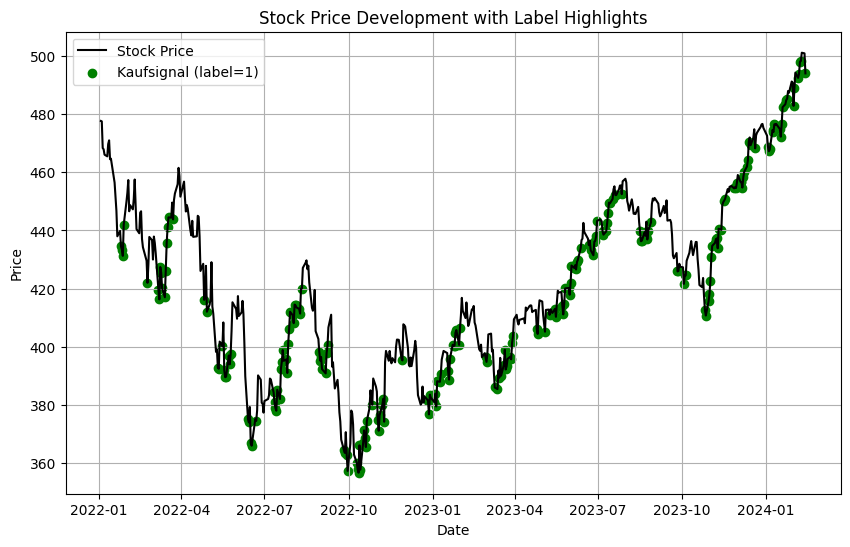

In [71]:
plot_df = full_df["2022-01-01":]

plt.figure(figsize=(10, 6))
plt.plot(plot_df.index, plot_df['Close'], label='Stock Price', color='black')

# Highlight points where 'label' is 1 in green
plt.scatter(plot_df[plot_df['label'] == 1].index, plot_df[plot_df['label'] == 1]['Close'], color='green', label='Kaufsignal (label=1)')

# Customize the plot
plt.title('Stock Price Development with Label Highlights')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [72]:
full_df = ichimoku(full_df)
full_df

,Open,High,Low,Close,Adj Close,Volume,vola,label,upper_bound,lower_bound,...,tenkan_sen_higher_cloud,kijun_sen_higher_cloud,tenkan_sen_cloudDIFF,kijun_sen_cloudDIFF,positive_crossover,crossover,crossover_above,crossover_below,positive_crossover_cloud,crossover_cloud
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-05,141.330002,141.399994,140.380005,140.539993,101.254112,76645300,0.007141,1,142.547092,139.034669,...,0,0,NaN,NaN,0,0,0,0,0,0
2007-01-08,140.820007,141.410004,140.250000,141.190002,101.722412,71655000,0.006747,1,143.095209,139.761097,...,0,0,NaN,NaN,0,0,0,0,0,0
2007-01-09,141.309998,141.600006,140.399994,141.070007,101.635956,75680100,0.005375,1,142.586370,139.932735,...,0,0,NaN,NaN,0,0,0,0,0,0
2007-01-10,140.580002,141.570007,140.300003,141.539993,101.974556,72428000,0.004886,1,142.923131,140.502640,...,0,0,NaN,NaN,0,0,0,0,0,0
2007-01-11,141.580002,142.619995,141.500000,142.160004,102.421211,54476800,0.004604,1,143.469149,141.178145,...,0,0,NaN,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-07,496.290009,498.529999,495.359985,498.100006,498.100006,70556500,0.007510,1,505.581446,492.488927,...,1,1,21.629997,13.415001,0,0,0,0,0,0
2024-02-08,498.100006,498.709991,497.260010,498.320007,498.320007,52343600,0.007174,1,505.470226,492.957343,...,1,1,21.719994,13.504997,0,0,0,0,0,0
2024-02-09,498.839996,501.649994,498.489990,501.200012,501.200012,63979400,0.006898,0,508.114414,496.014211,...,1,1,23.189995,14.974998,0,0,0,0,0,0


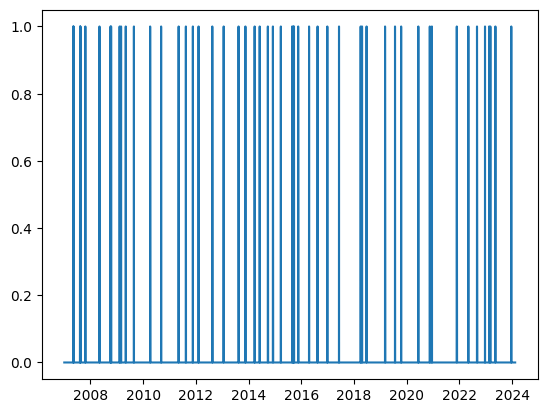

In [73]:
plt.plot(full_df.index, full_df['positive_crossover_cloud'])

In [74]:
full_df['close_pct'] = full_df['Close'].pct_change(1)
full_df['Volume_pct'] = full_df['Volume'].pct_change(1)

In [75]:
full_df.dropna(inplace=True)
backtest_df = full_df.copy()
full_df.drop(['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume', "upper_bound", "lower_bound"], axis=1, inplace=True)

In [76]:
# for col in list(full_df.columns):
#     full_df=create_lagged_columns(full_df, 20, col)

In [77]:
full_df

,vola,label,tenkan_sen_perc,kijun_sen_perc,senkou_span_a_perc,senkou_span_b_perc,tenkan_sen_higher_close,kijun_sen_higher_close,senkou_span_a_higher_close,senkou_span_b_higher_close,...,tenkan_sen_cloudDIFF,kijun_sen_cloudDIFF,positive_crossover,crossover,crossover_above,crossover_below,positive_crossover_cloud,crossover_cloud,close_pct,Volume_pct
Date,,,,,,,,,,,,,,,,,,,,,
2007-04-30,0.005868,1,0.000000,0.000000,0.000053,0.0,0,0,0,0,...,6.495003,3.595001,0,0,0,0,0,0,-0.008293,-0.067630
2007-05-01,0.005598,1,0.000000,0.000000,0.000231,0.0,0,0,0,0,...,6.495003,3.595001,0,0,0,0,0,0,0.002563,0.331786
2007-05-02,0.005498,1,0.002802,0.000517,0.000000,0.0,0,0,0,0,...,6.909996,3.669998,0,0,0,0,0,0,0.005852,-0.351436
2007-05-03,0.005346,0,0.002458,0.001549,0.002430,0.0,0,0,0,0,...,7.275002,3.894997,0,0,0,0,0,0,0.005417,-0.006428
2007-05-04,0.005111,0,0.002418,0.002475,0.000000,0.0,0,0,0,0,...,7.635002,4.254997,0,0,0,0,0,0,0.003791,0.113658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-07,0.007510,1,0.002533,0.002577,0.000944,0.0,0,0,0,0,...,21.629997,13.415001,0,0,0,0,0,0,0.008340,0.261772
2024-02-08,0.007174,1,0.000183,0.000187,0.000000,0.0,0,0,0,0,...,21.719994,13.504997,0,0,0,0,0,0,0.000442,-0.258132
2024-02-09,0.006898,0,0.002995,0.003046,0.000000,0.0,0,0,0,0,...,23.189995,14.974998,0,0,0,0,0,0,0.005779,0.222297


In [78]:
test_begin = "2021-01-01"
train_df = full_df[:test_begin]
test_df = full_df[test_begin:]

In [79]:
Xs_train = train_df.drop('label', axis=1).values
Xs_test = test_df.drop('label', axis=1).values
Ys_train = train_df['label'].values
Ys_test = test_df['label'].values

In [80]:
# MLP params
hidden_layer_width = 15
n_hidden_layers = 5

class NN(nn.Module):
    n_hidden_layers: int
    layer_width: int

    @nn.compact
    def __call__(self, x):
        for i in range(self.n_hidden_layers):
            x = nn.Dense(features=self.layer_width)(x)
            x = nn.tanh(x)
        return nn.Dense(features=1)(x)


bnn = NN(n_hidden_layers, hidden_layer_width)

In [81]:
rng_key, eval_key = jax.random.split(rng_key)


def fit_and_eval_single_mlp(key, X_train, Y_train, X_test):
    return fit_and_eval(
        key, bnn, logdensity_fn_of_bnn, X_train, Y_train, X_test, grid= None, num_steps=1000,batch_size_particles = 75, batch_size_data = 64, num_particles=400
    )

Ys_pred_train, Ys_pred_test, _, Ys_probabilities_train, Ys_probabilities_test = fit_and_eval_single_mlp(eval_key, Xs_train, Ys_train, Xs_test)

100%|██████████| 1000/1000 [07:06<00:00,  2.34it/s]


In [82]:
min(Ys_probabilities_train)

Array(0.24499999, dtype=float32)

In [83]:
import sklearn.metrics as skm

#Create a Precision/Recall curve for our training data
precision_train, recall_train, pr_thresholds_train = skm.precision_recall_curve(Ys_train, Ys_probabilities_train)
fscore_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)

#Find optimal thresh on PR curve train
ix = np.argmax(fscore_train)
optimal_threshold = pr_thresholds_train[ix]
optimal_threshold

0.345

In [84]:
test_signal_predictions_adj = Ys_probabilities_test > optimal_threshold

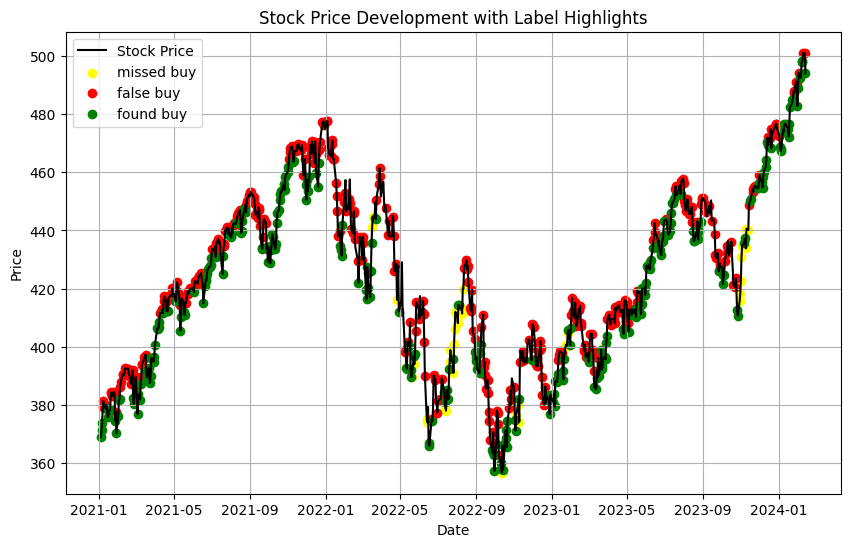

In [85]:
# Add Close prices back to df to see the visualization
plot_df = backtest_df[test_begin:]
plot_df["signal"] = test_signal_predictions_adj.astype(int)

plt.figure(figsize=(10, 6))
plt.plot(plot_df.index, plot_df['Close'], label='Stock Price', color='black')

# Highlight points where 'label' is 1 in green
plt.scatter(plot_df[(plot_df['label'] == 1) & (plot_df['signal'] == 0)].index, plot_df[(plot_df['label'] == 1) & (plot_df['signal'] == 0)]['Close'], color='yellow', label='missed buy')
plt.scatter(plot_df[(plot_df['label'] == 0) & (plot_df['signal'] == 1)].index, plot_df[(plot_df['label'] == 0) & (plot_df['signal'] == 1)]['Close'], color='red', label='false buy')
plt.scatter(plot_df[(plot_df['label'] == 1) & (plot_df['signal'] == 1)].index, plot_df[(plot_df['label'] == 1) & (plot_df['signal'] == 1)]['Close'], color='green', label='found buy')

# Customize the plot
plt.title('Stock Price Development with Label Highlights')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [86]:
print(f"Train accuracy = {100 * jnp.mean(Ys_pred_train == Ys_train):.2f}%")
print(f"Test accuracy = {100 * jnp.mean(Ys_pred_test == Ys_test):.2f}%")

Train accuracy = 59.16%
Test accuracy = 59.00%


In [87]:
i = 0
cash = plot_df["Close"][0]
percentage_invested = 0.5

cash_history = []
while i < (len(plot_df)-investment_horizon):
    cash_history.append(cash)
    if plot_df["signal"][i] == 1:
        invest_sum = percentage_invested*cash
        cash_vorr = cash - invest_sum
        buy_price = plot_df["Close"][i]

        z=1
        while z <= investment_horizon:
            if plot_df["Close"][i+z] >= plot_df["upper_bound"][i]:
                sell_price = plot_df["Close"][i+z]
                perc_change = sell_price / buy_price
                invest_sum_updated = invest_sum*perc_change
                cash = cash_vorr + invest_sum_updated
                cash_history.append(cash)
                break
            elif plot_df["Close"][i+z] <= plot_df["lower_bound"][i]:
                sell_price = plot_df["Close"][i+z]
                perc_change = sell_price / buy_price
                invest_sum_updated = invest_sum*perc_change
                cash = cash_vorr + invest_sum_updated
                cash_history.append(cash)
                break
            elif (z == investment_horizon):
                sell_price = plot_df["Close"][i+z]
                perc_change = sell_price / buy_price
                invest_sum_updated = invest_sum*perc_change
                cash = cash_vorr + invest_sum_updated
                cash_history.append(cash)
                break
            z = z+1
            cash_history.append(cash)
        i = i+z
    i = i+1

plot_df = plot_df[:i]
plot_df["cash"] = cash_history

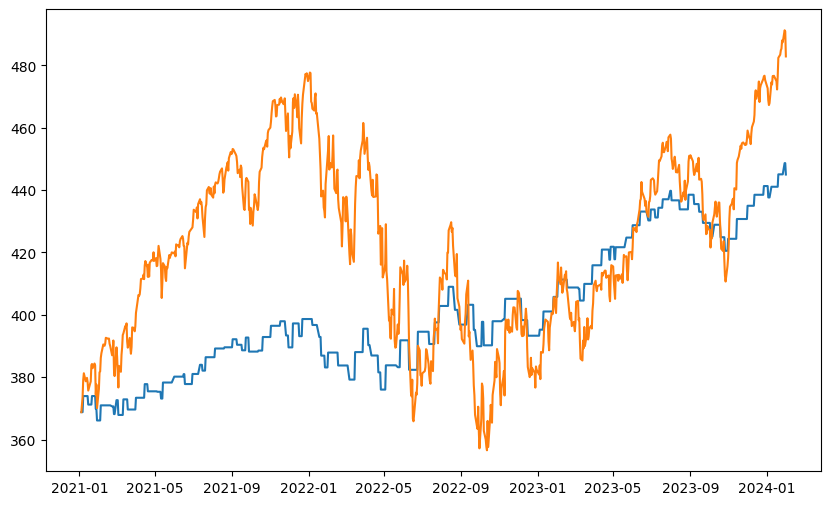

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(plot_df.index, plot_df['cash'])
plt.plot(plot_df.index, plot_df['Close'])